In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing data from the CSV file 
data = pd.read_csv('concrete.csv')
# Visualizing the dataset
data.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [3]:
# Checking for the null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
# Checking for any missing values
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [5]:
# Checking for negative Values
data[data < 0 ].any()

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

In [6]:
# Checking for any zero value in Age Column
data[data['age'] == 0].age.any()

False

In [7]:
data.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


# EDA

## ---Univariate Analysis---

### Cement

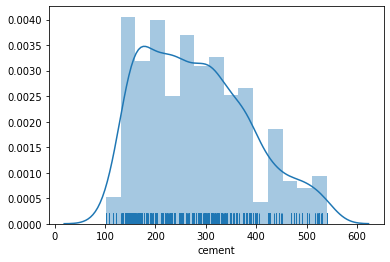

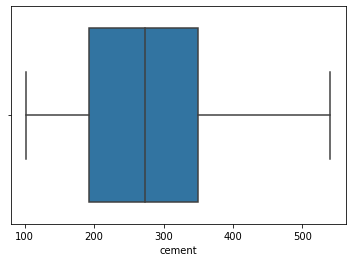

count    1030.000000
mean      281.167864
std       104.506364
min       102.000000
25%       192.375000
50%       272.900000
75%       350.000000
max       540.000000
Name: cement, dtype: float64


In [8]:
sns.distplot(data['cement'],rug = True ,kde = True)
plt.show()
sns.boxplot(data['cement'])
plt.show()
print(data['cement'].describe())

    We can see that the distribution of of the cement attribute is showing slight normal distribution. We we can observe a slight skewness in the distribution towards left.
    The mean of the distribution is at 281.167 with standard deviation of 104.506.
    Box plot of the distribution do not show any outliers in this attribute.

### Slag

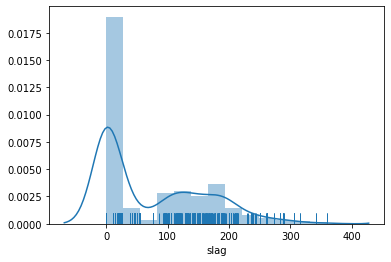

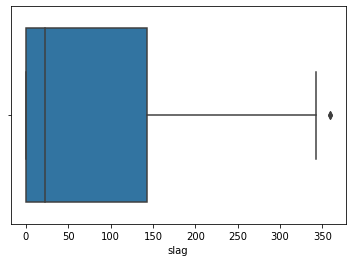

count    1030.000000
mean       73.895825
std        86.279342
min         0.000000
25%         0.000000
50%        22.000000
75%       142.950000
max       359.400000
Name: slag, dtype: float64


In [9]:
sns.distplot(data['slag'],rug = True ,kde = True)
plt.show()
sns.boxplot(data['slag'])
plt.show()
print(data['slag'].describe())

    We can see in the histogram of the slag attribute, distribution is skewed towards the left because of excessive zero values present in the distribution.
    We can also see the same in the box plot the entire IQR shifts towards left because of excessive 0 entries.
    We can observe single outline in the distribution as shown in the box plot.
 
<b>The zeros observed in this distribution are true zeros thus cannot be removed or replaced by any other Central values.
    Thus to observe the exact distribution we will skip the zero values in the distribution and visualise it below.</b>

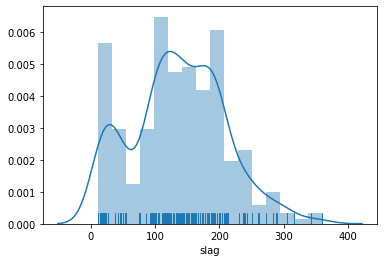

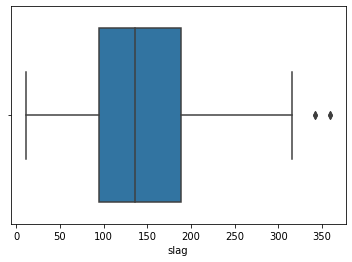

In [10]:
sns.distplot(data[data['slag'] != 0].slag,rug = True ,kde = True)
plt.show()
sns.boxplot(data[data['slag'] != 0].slag)
plt.show()

    After neglecting the zero entries in  we can see that the attribute its showing a bi modal distribution.
    Also the interquartile region shifts more towards the centre of the complete distribution with two outliers line above 300 as seen in the box plot.
<b>While addressing the presence of the outliers of this attribute we will try  to neglect the excessive zero entries and cap the distribution with the the upper limit and lower limit values.</b>

### ASH

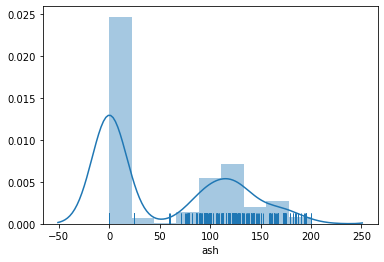

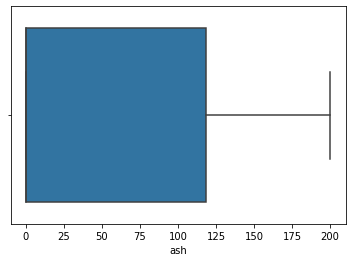

count    1030.000000
mean       54.188350
std        63.997004
min         0.000000
25%         0.000000
50%         0.000000
75%       118.300000
max       200.100000
Name: ash, dtype: float64


In [11]:
sns.distplot(data['ash'],rug = True ,kde = True) 
plt.show()
sns.boxplot(data['ash'])
plt.show()
print(data['ash'].describe())

    As observed above the the Ash attribute is also skewed towards left because of excessive zero values present in the distribution and is bimodal.
    Similarly boxplot shows entire IQR shift towards left because of excessive zero entries.
 <b>Again since this zeroes are true zeroes we cannot replace them.
    Thus to observe the exact distribution we will skip the zero values and visualise it below.</b>

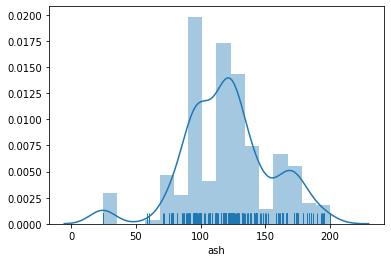

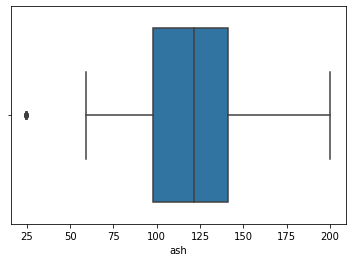

In [12]:
sns.distplot(data[data['ash'] != 0].ash,rug = True ,kde = True)
plt.show()
sns.boxplot(data[data['ash'] != 0].ash)
plt.show()

    After neglecting this zero entries we can see  that the distribution is tri modal in nature.
    Also the interquartile reason shifts more towards the centre of the complete distribution without any outliers seen in the box plot.

### Water

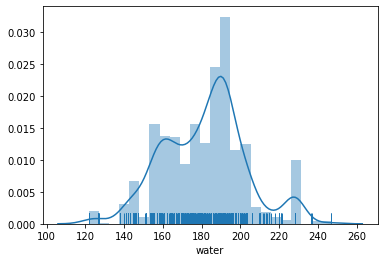

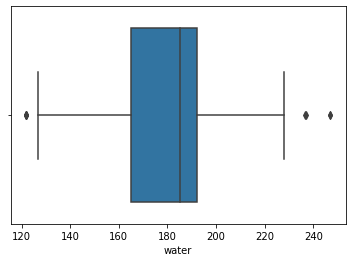

count    1030.000000
mean      181.567282
std        21.354219
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: water, dtype: float64


In [13]:
sns.distplot(data['water'],rug = True ,kde = True)
plt.show()
sns.boxplot(data['water'])
plt.show()
print(data['water'].describe())

The histogram shows water attribute distribution is tri modal.
The box plot of the attribute shows three outliers in the distribution one below the lower limit and 2 above the upper limit.
The mean of the distribution is 181.56 and standard deviation is 21.35.

### Superplastic

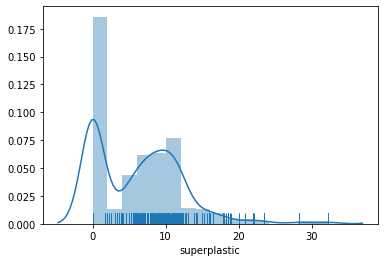

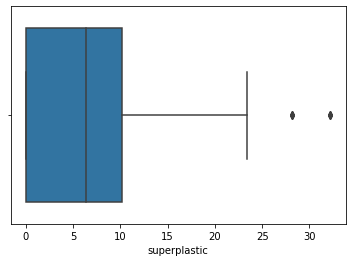

count    1030.000000
mean        6.204660
std         5.973841
min         0.000000
25%         0.000000
50%         6.400000
75%        10.200000
max        32.200000
Name: superplastic, dtype: float64


In [14]:
sns.distplot(data['superplastic'],rug = True ,kde = True)
plt.show()
sns.boxplot(data['superplastic'])
plt.show()
print(data['superplastic'].describe())

    We can see the histogram distribution off the attribute superplastic is bi modal I am skill towards left because of excessive zero entries as seen before.
    Also the box plot has the entire IQR shifted towards the left with to outliers.
<b>Again during this experiment zero values record absolute zero values does cannot be discarded replaced.
We will observe this attribute by neglecting the excessive zero entries.</b>

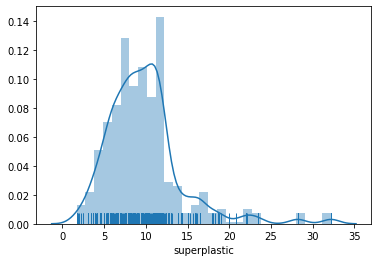

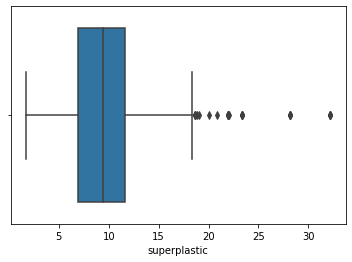

count    651.000000
mean       9.816897
std        4.580328
min        1.700000
25%        6.950000
50%        9.400000
75%       11.600000
max       32.200000
Name: superplastic, dtype: float64


In [15]:
sns.distplot(data[data['superplastic'] != 0].superplastic,rug = True ,kde = True)
plt.show()
sns.boxplot(data[data['superplastic'] != 0].superplastic)
plt.show()
print((data[data['superplastic'] != 0].superplastic).describe())

    After neglecting the zero values we can see that the superplastic distribution is a slightly  left skewed normal distribution with the presence of few outliers towards the right tail.
    We can see in the box plot the the interquartile region shrinks exactly towards the centre of the distribution and also lot of outliers present on the right tail.

### Coarseagg 

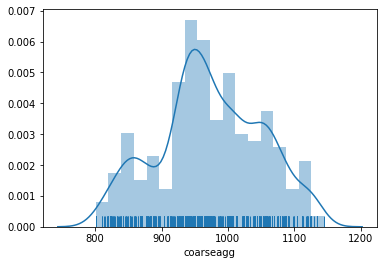

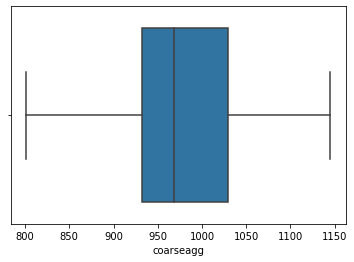

count    1030.000000
mean      972.918932
std        77.753954
min       801.000000
25%       932.000000
50%       968.000000
75%      1029.400000
max      1145.000000
Name: coarseagg, dtype: float64


In [16]:
sns.distplot(data['coarseagg'],rug = True ,kde = True)
plt.show()
sns.boxplot(data['coarseagg'])
plt.show()
print(data['coarseagg'].describe())

    In the histogram of coarseagg distribution we can see that it is bi modal in nature.
    Also the box plot of the distribution shows no outliers within total range of 800 - 1150.
    The mean of the distribution is 972.91 and the standard deviation is 77.75

### Fineagg

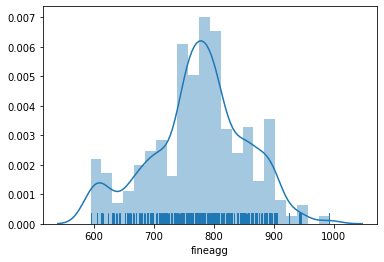

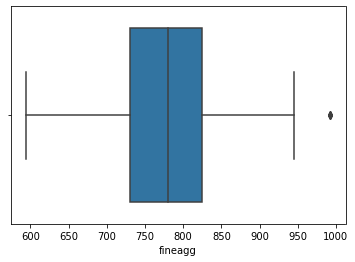

count    1030.000000
mean      773.580485
std        80.175980
min       594.000000
25%       730.950000
50%       779.500000
75%       824.000000
max       992.600000
Name: fineagg, dtype: float64


In [17]:
sns.distplot(data['fineagg'],rug = True ,kde = True)
plt.show()
sns.boxplot(data['fineagg'])
plt.show()
print(data['fineagg'].describe())

    The histogram of Fineagg distribution we can see  that it is bimodal in nature and few outliers towards the right tail of the distribution.
    It can be seen in the box plot the IQR lies in the centre of the complete distribution with a single outlier towards the right tail of the distribution.
    The mean of the distribution is 773.58 and the standard deviation is 80.17

## ---Multi-Variate Analysis---

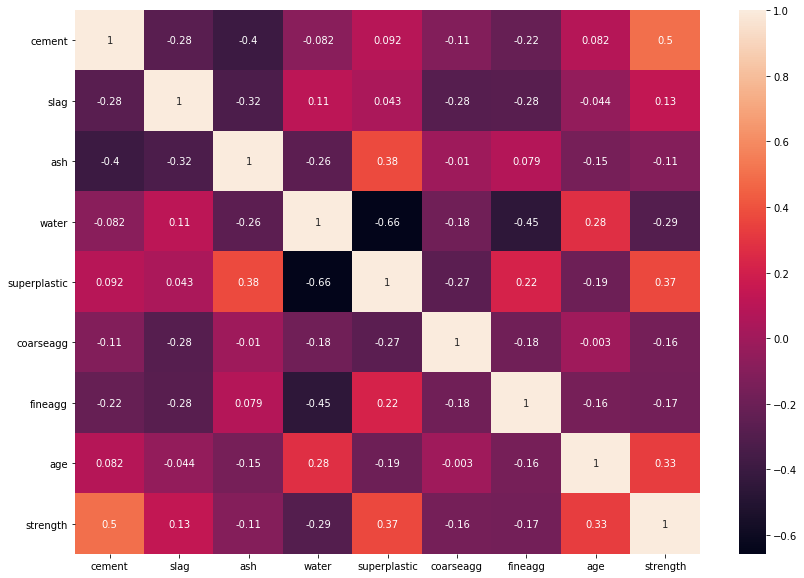

In [18]:
# Before starting the analysis we will look into co-relation PLOT
plt.figure(figsize = (14,10))
sns.heatmap(data.corr(), annot = True , fmt = '.2g')

1) We cannot see high correlation values among any attributes thus we cannot directly drop any attributes for feature selection.

2) The maximum positive corelation value we see between the attributes is of 0.38 i.e. between (Superplastic & Ash) and maximum negative corelation value we see between the attributes is of -0.66 i.e. between (Superplastic & Water)

3) Cement & Ash are also showing relatively high negative co-relation of -0.4 and also Fineagg & water are also showing relatively high negative co-relation of -0.45.

4) In co-relation of attributes vs the strength (target value) we can see cement being the most important feature or attribute have a co-realtion of 0.5 followed by Superplastic and Age. Which can be explained scientifically, as the amount of cement increases the strength of the mixture also increases, as it is allowed to set for longer time it the strength of the mixture increases.

5) No attribute have very less co-relation with the strength thus we will not drop any attributes.

### Attribute vs Atrribute

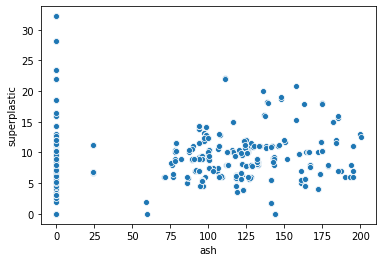

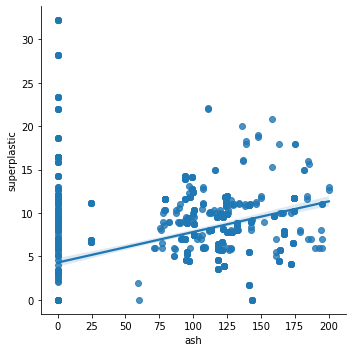

In [19]:
# Superplastic & Ash
sns.scatterplot(data['ash'],data['superplastic'])
plt.show()
sns.lmplot('ash','superplastic',data)
plt.show()

    We can see from the scatter plot and the linear plot of of the two attributes (superplastic and ash) that it is showing a slight positive correlation with the cloud of data points almost distributed evenly around the line.
    Since there is no no clear trend followed by the data points we cannot comment on any direct relation between the two attributes thus cannot discard any.
    We can see due to the presence of high amount of 0 entries in both attributes a lot of points are seen along the zeros of both the axis.

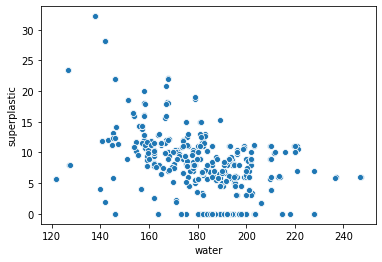

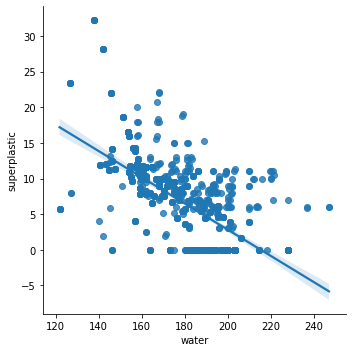

In [20]:
# Superplastic & water
sns.scatterplot(data['water'],data['superplastic'])
plt.show()
sns.lmplot('water','superplastic',data)
plt.show()

    We can see from the scatter plot and the linear plot of the two attributes (superplastic and water) that it is showing a negative correlation with the cloud of data points distributed evenly around the line.
    Since there is no clear trend followed by the data points we cannot comment on any direct relation between the two attributes thus cannot discard any.
    Also so because of high amount of zero entries in superplastic attribute we can see a lot of points along the zero of its axis

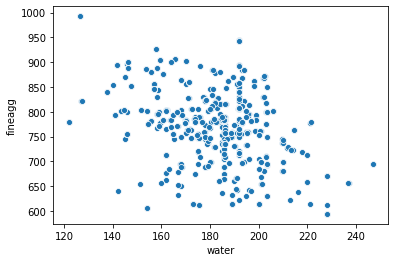

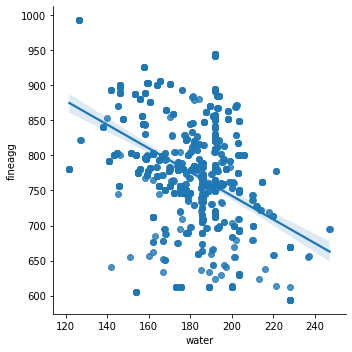

In [21]:
# Fineagg & water
sns.scatterplot(data['water'],data['fineagg'])
plt.show()
sns.lmplot('water','fineagg',data)
plt.show()

    We can see from the scatter plot and the linear plot of the two attributes (Fineagg and water) that it is showing a negative correlation with the cloud of data points distributed evenly around the line.
    Since there is no clear trend followed by the data points we cannot comment on any direct relation between the two attributes thus cannot discard any.

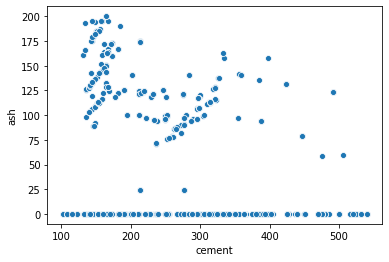

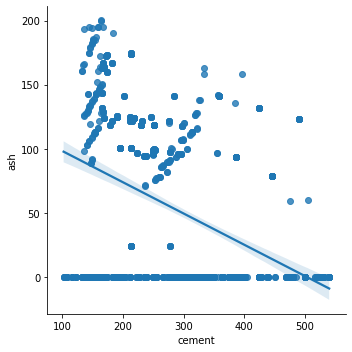

In [22]:
## Superplastic & water
sns.scatterplot(data['cement'],data['ash'])
plt.show()
sns.lmplot('cement','ash',data)
plt.show()

    We can see from the scatter plot and the linear plot of the two attributes (Ash and cement) that it is showing a negative correlation but the cloud of datapoints do not seem to converge with the data points.

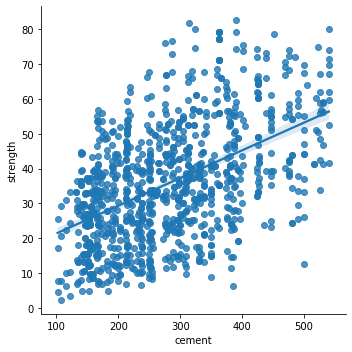

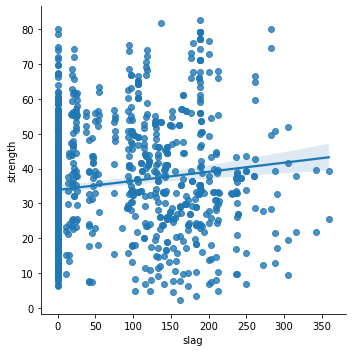

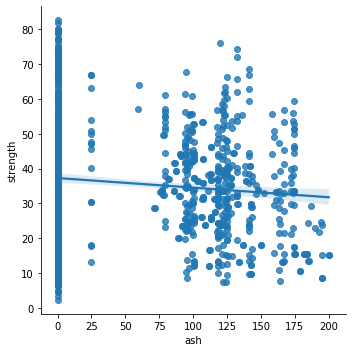

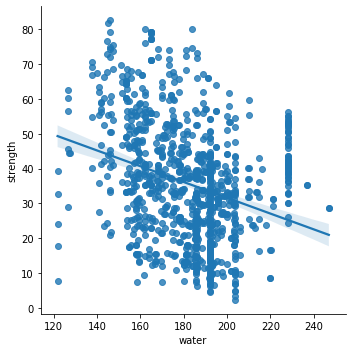

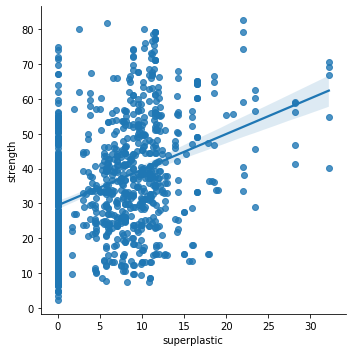

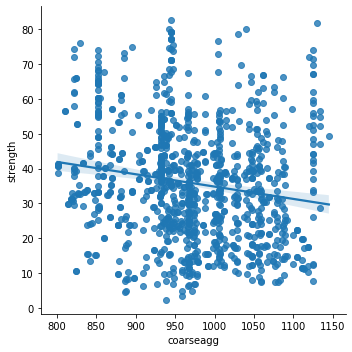

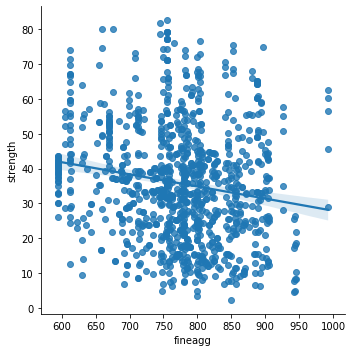

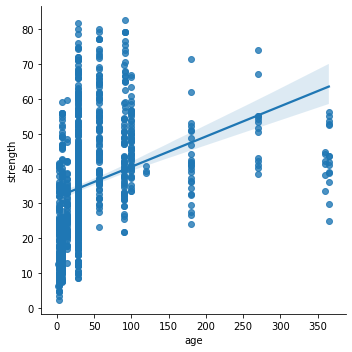

In [23]:
for col in data.columns[:-1]:
    sns.lmplot(col,'strength',data)
    plt.show()

    1) The linear scatter plots of all the strength versus all the attributes shows the importance off the attributes for the relation of the attributes with the the output variable.
    
    2) We can see that the attributes cement, super plastic and age show high positive correlation with the output variable, increase in this attributes leads to to subsequent increase in the strength of the mixture thus are important in predicting the strength values.
    
    3) The attributes slag, water are are slightly correlated with the output variable strength
    
    4) All the other attributes as seen in the scatter plots are showing very less correlation that is the values of the variable strength it is not highly dependent on this variables example Ash, Courseagg and Fineagg. This variable have almost a parallel line does contributing very less to the the prediction of of the variable strength

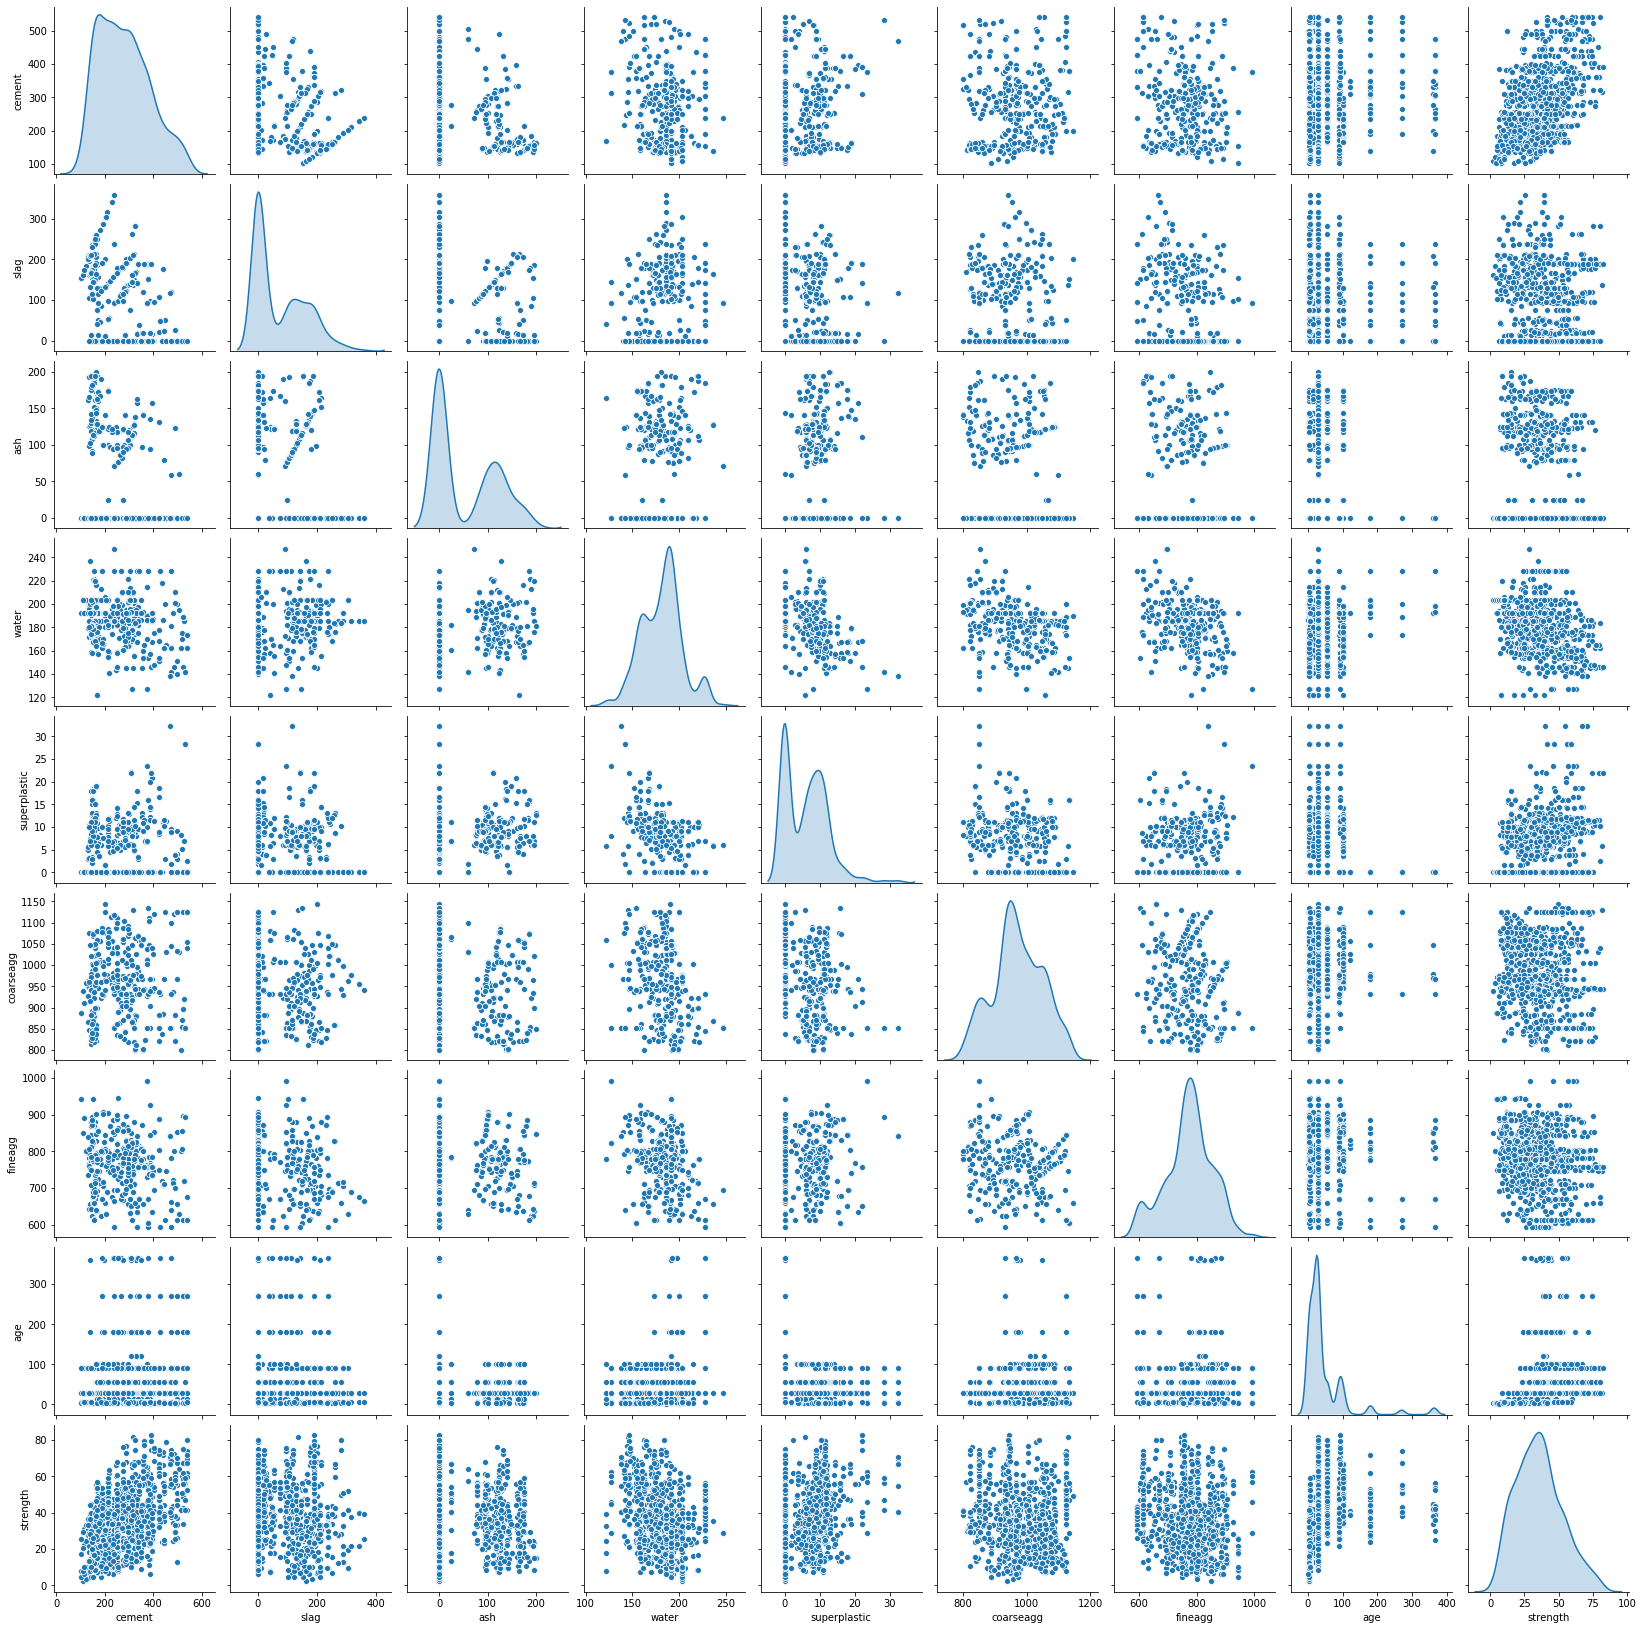

In [24]:
sns.pairplot(data , diag_kind = 'kde')

As we can see from the pairplors & corelation heatmaps there is no attributes having very high inter co relation also there are no attributes having very small co-relation with the strength output thus we will keep all the attributes for the anlalysis.

# Handling Missing Values and outliers in the data set

We checked for the missing or negative values in the data set, but there were no such instances.
Thus we will move on to outliers in the dataset

<b> Since the dataset is recorded from the experiment all the zero values noted are actual weights of the constituent attribute thus will not replace them or change them.</b>

    We will first try to drop all the values lying 2.5 deviations outside the mean.

In [25]:
data_dropped = data.copy()
for col in data.columns:
    data_dropped = data_dropped[data_dropped[col] < (data_dropped[col].mean() + 2.5 * data_dropped[col].std())]
    data_dropped = data_dropped[data_dropped[col] > (data_dropped[col].mean() - 2.5 * data_dropped[col].std())]
print(data_dropped.shape)

(939, 9)


    As we see the data samples fall down from 1030 to 908 thus we might lose a lot of information in the process. 

<b> As discussed in uni variate analysis we will replace outliers of the attributes 'slag','ash','superplastic' with the upper(mean + 2.5*std) and lower limits (mean - 2.5*std) of the distribution formed after neglacting the excessive zero values observed in the data set. 

 while all the other attributes will be capped with upper and lower limits.</b>

In [26]:
for col in (data.columns):
    upper_limit = data[col].mean() + 2.5*data[col].std()
    lower_limit = data[col].mean() - 2.5*data[col].std()
    temp = data[col]
    temp[temp > upper_limit] = upper_limit
    temp[temp < lower_limit] = lower_limit
    data[col] = temp

# Feature Engineering

<b>--As we explored in EDA we all the attribute have very low inter-corelation and also the co-relation values of the attributes with the strength (output varaible) are not very small to not consider them or drop any feature.--</b>

.......................................................................................................................................................................................................



Undertanding the process of formation of Concrete and from reasarch on factors affecting the Concrete Strength all the attributes are useful for the analysis, also two extra features can be introduced from the existing data attributes as they affect the strength of the concrete.

1) Cement-Aggregate (coarse & Fine) Ratio ( as this value increases the strength increases to some extent )

2) Water-Cement Ratio ( as this value increases the strength decreases to some extent )

In [27]:
# Cement-Coarsagg ratio
Cement_Fineagg = []
for i in range (data.shape[0]):
    temp = (data.loc[i,'cement'])/(data.loc[i,'fineagg'] + data.loc[i,'coarseagg'])
    Cement_Fineagg.append(round(temp, ndigits = 3))
data['Cement_agg_ratio'] = Cement_Fineagg

In [28]:
# Water-Cement ratio
Water_Cement = []
for i in range (data.shape[0]):
    temp = (data.loc[i,'water'])/(data.loc[i,'cement'])
    Water_Cement.append(round(temp, ndigits = 3))
data['Water_Cement_ratio'] = Water_Cement

In [29]:
# Displacing the output column to the end for better viewing
data['Strength'] = data['strength']
data.drop(['strength'],axis = 1, inplace= True)

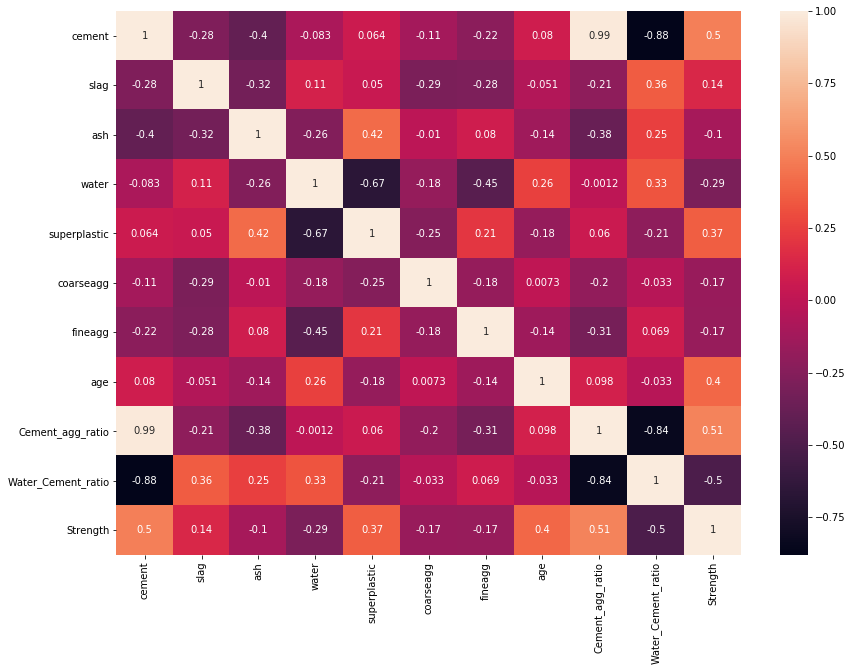

In [30]:
# Before starting the analysis we will look into co-relation PLOT
plt.figure(figsize = (14,10))
sns.heatmap(data.corr(), annot = True , fmt = '.2g')

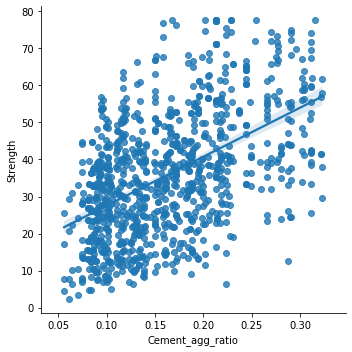

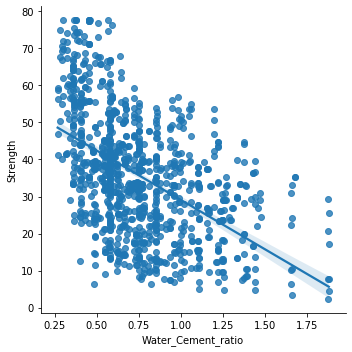

In [31]:
for col in ['Cement_agg_ratio','Water_Cement_ratio']:
    sns.lmplot(col,'Strength',data)
    plt.show()

# Feature Selection

In [32]:
# Splitting the Dataset into training and test set for Feature selection
x_train,x_test,y_train,y_test = train_test_split(data.iloc[:,:-1],data.iloc[:,-1],test_size =0.3, random_state = 10)

In [33]:
# Build RF classifier to use in feature selection
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100, n_jobs=-1)

scores = []
for i in range (7,11):
    # Build step forward feature selection
    sfs1 = sfs(clf,
               k_features=i,
               forward=True,
               floating=False,
               verbose=False,
               scoring='r2',
               cv=5)

    # Perform SFFS
    sfs1 = sfs1.fit(x_train, y_train)
    # Selected features
    feat_cols = list(sfs1.k_feature_idx_)
    feature_names = []
    for j in feat_cols:
        feature_names.append(data.columns[j])
    clf = RandomForestRegressor(n_estimators=100, n_jobs=-1,random_state= 3)
    CV = cross_val_score(clf,x_test.iloc[:, feat_cols],y_test,cv = 7)
    scores.append(CV.mean())
    print('Features names selected for ' + str(i) + ' minimum features are :')
    print(feature_names)
    print('\n ')

Features names selected for 7 minimum features are :
['slag', 'ash', 'superplastic', 'fineagg', 'age', 'Cement_agg_ratio', 'Water_Cement_ratio']

 
Features names selected for 8 minimum features are :
['slag', 'ash', 'water', 'superplastic', 'fineagg', 'age', 'Cement_agg_ratio', 'Water_Cement_ratio']

 
Features names selected for 9 minimum features are :
['cement', 'slag', 'ash', 'water', 'superplastic', 'fineagg', 'age', 'Cement_agg_ratio', 'Water_Cement_ratio']

 
Features names selected for 10 minimum features are :
['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'Cement_agg_ratio', 'Water_Cement_ratio']

 


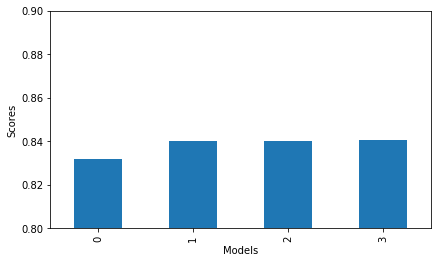

In [34]:
# Plotting the Scores
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(121)
plt.ylim(0.80,0.9)
ax1.set_xlabel('Models')
ax1.set_ylabel('Scores')
scores = pd.Series(scores)
scores.plot(kind='bar')

We can see that the model with 8 ,9 and 10 features have very close average CV score.

Models with 8 and 10 Features are also been trained and tested but the model with 9 Features have provided with the best accuracies and R2 scores.

The list for the selected features are:

    ['cement', 'slag', 'ash', 'water', 'superplastic', 'fineagg', 'age', 'Cement_agg_ratio', 'Water_Cement_ratio']

In [35]:
# Dropping the 'coarseagg' feature
data.drop(['coarseagg'],axis =1 ,inplace =True)

# Complexity of the Model

In [36]:
# Adjusted R2 Function

def adj_r2(X,score):
    import numpy as np
    n = X.shape[0]
    p = X.shape[1]
    r2 = 1-(1-(np.square(score)))*((n-1)/(n-p-1))
    return(r2)

In [37]:
# Importing the Linear Model
from sklearn.linear_model import LinearRegression

# Separating the Independent and Dependent Attributes.
X = data.drop(['Strength'],axis = 1)
Y = data['Strength'].values

# Scaling the Attributes 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Training the Linear Model
REGR =LinearRegression()
REGR.fit(X_scaled,Y)
print('R2 Value of the model - ' + str(REGR.score(X_scaled,Y)))

# Adjusted R2 
print('Adjusted R2 Value - ' + str(adj_r2(X_scaled,REGR.score(X_scaled,Y))))

R2 Value of the model - 0.6838275010030397
Adjusted R2 Value - 0.46292258099095696


In [38]:
# introducing Degree 2 Features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2 , interaction_only= True)
X_quad = poly.fit_transform(X_scaled)

# Degree 2 Model
REGR =LinearRegression()
REGR.fit(X_quad,Y)
print('R2 Value of the model - ' + str(REGR.score(X_quad,Y)))

# Adjusted R2 
print('Adjusted R2 Value - ' + str(adj_r2(X_quad,REGR.score(X_quad,Y))))

R2 Value of the model - 0.7912522579621384
Adjusted R2 Value - 0.608582359782663


In [39]:
# introducing Degree 3 Features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3 , interaction_only= True)
X_cub = poly.fit_transform(X_scaled)

# Degree 3 Model
REGR =LinearRegression()
REGR.fit(X_cub,Y)
print('R2 Value of the model - ' + str(REGR.score(X_cub,Y)))

# Adjusted R2 
print('Adjusted R2 Value - ' + str(adj_r2(X_cub,REGR.score(X_cub,Y))))

R2 Value of the model - 0.846971029724285
Adjusted R2 Value - 0.6764887241632813


In [40]:
# introducing Degree 4 Features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4 , interaction_only= True)
X_fourth = poly.fit_transform(X_scaled)

# Degree 4 Model
REGR =LinearRegression()
REGR.fit(X_fourth,Y)
print('R2 Value of the model - ' + str(REGR.score(X_fourth,Y)))

# Adjusted R2 
print('Adjusted R2 Value - ' + str(adj_r2(X_fourth,REGR.score(X_fourth,Y))))

R2 Value of the model - 0.8813181112942536
Adjusted R2 Value - 0.7027768953180249


In [41]:
# introducing Degree 5 Features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5 , interaction_only= True)
X_fifth = poly.fit_transform(X_scaled)

# Degree 5 Model
REGR =LinearRegression()
REGR.fit(X_cub,Y)
print('R2 Value of the model - ' + str(REGR.score(X_cub,Y)))

# Adjusted R2 
print('Adjusted R2 Value - ' + str(adj_r2(X_cub,REGR.score(X_cub,Y))))

R2 Value of the model - 0.846971029724285
Adjusted R2 Value - 0.6764887241632813


We Can see that the Linear model have an accuracy of only R-Squared value goes on increasing till 5th degree but the Adjusted R squared value increases till 4th degree upto 0.710 and decreases to 0.583.

Thus the complexity of the model with respect to the parameters is upto 4th degree.

In [42]:
print('The number of features in the fourth degree complexity model is : ' + str(X_fourth.shape[0]))

The number of features in the fourth degree complexity model is : 1030


# Exploring Clusters within the data

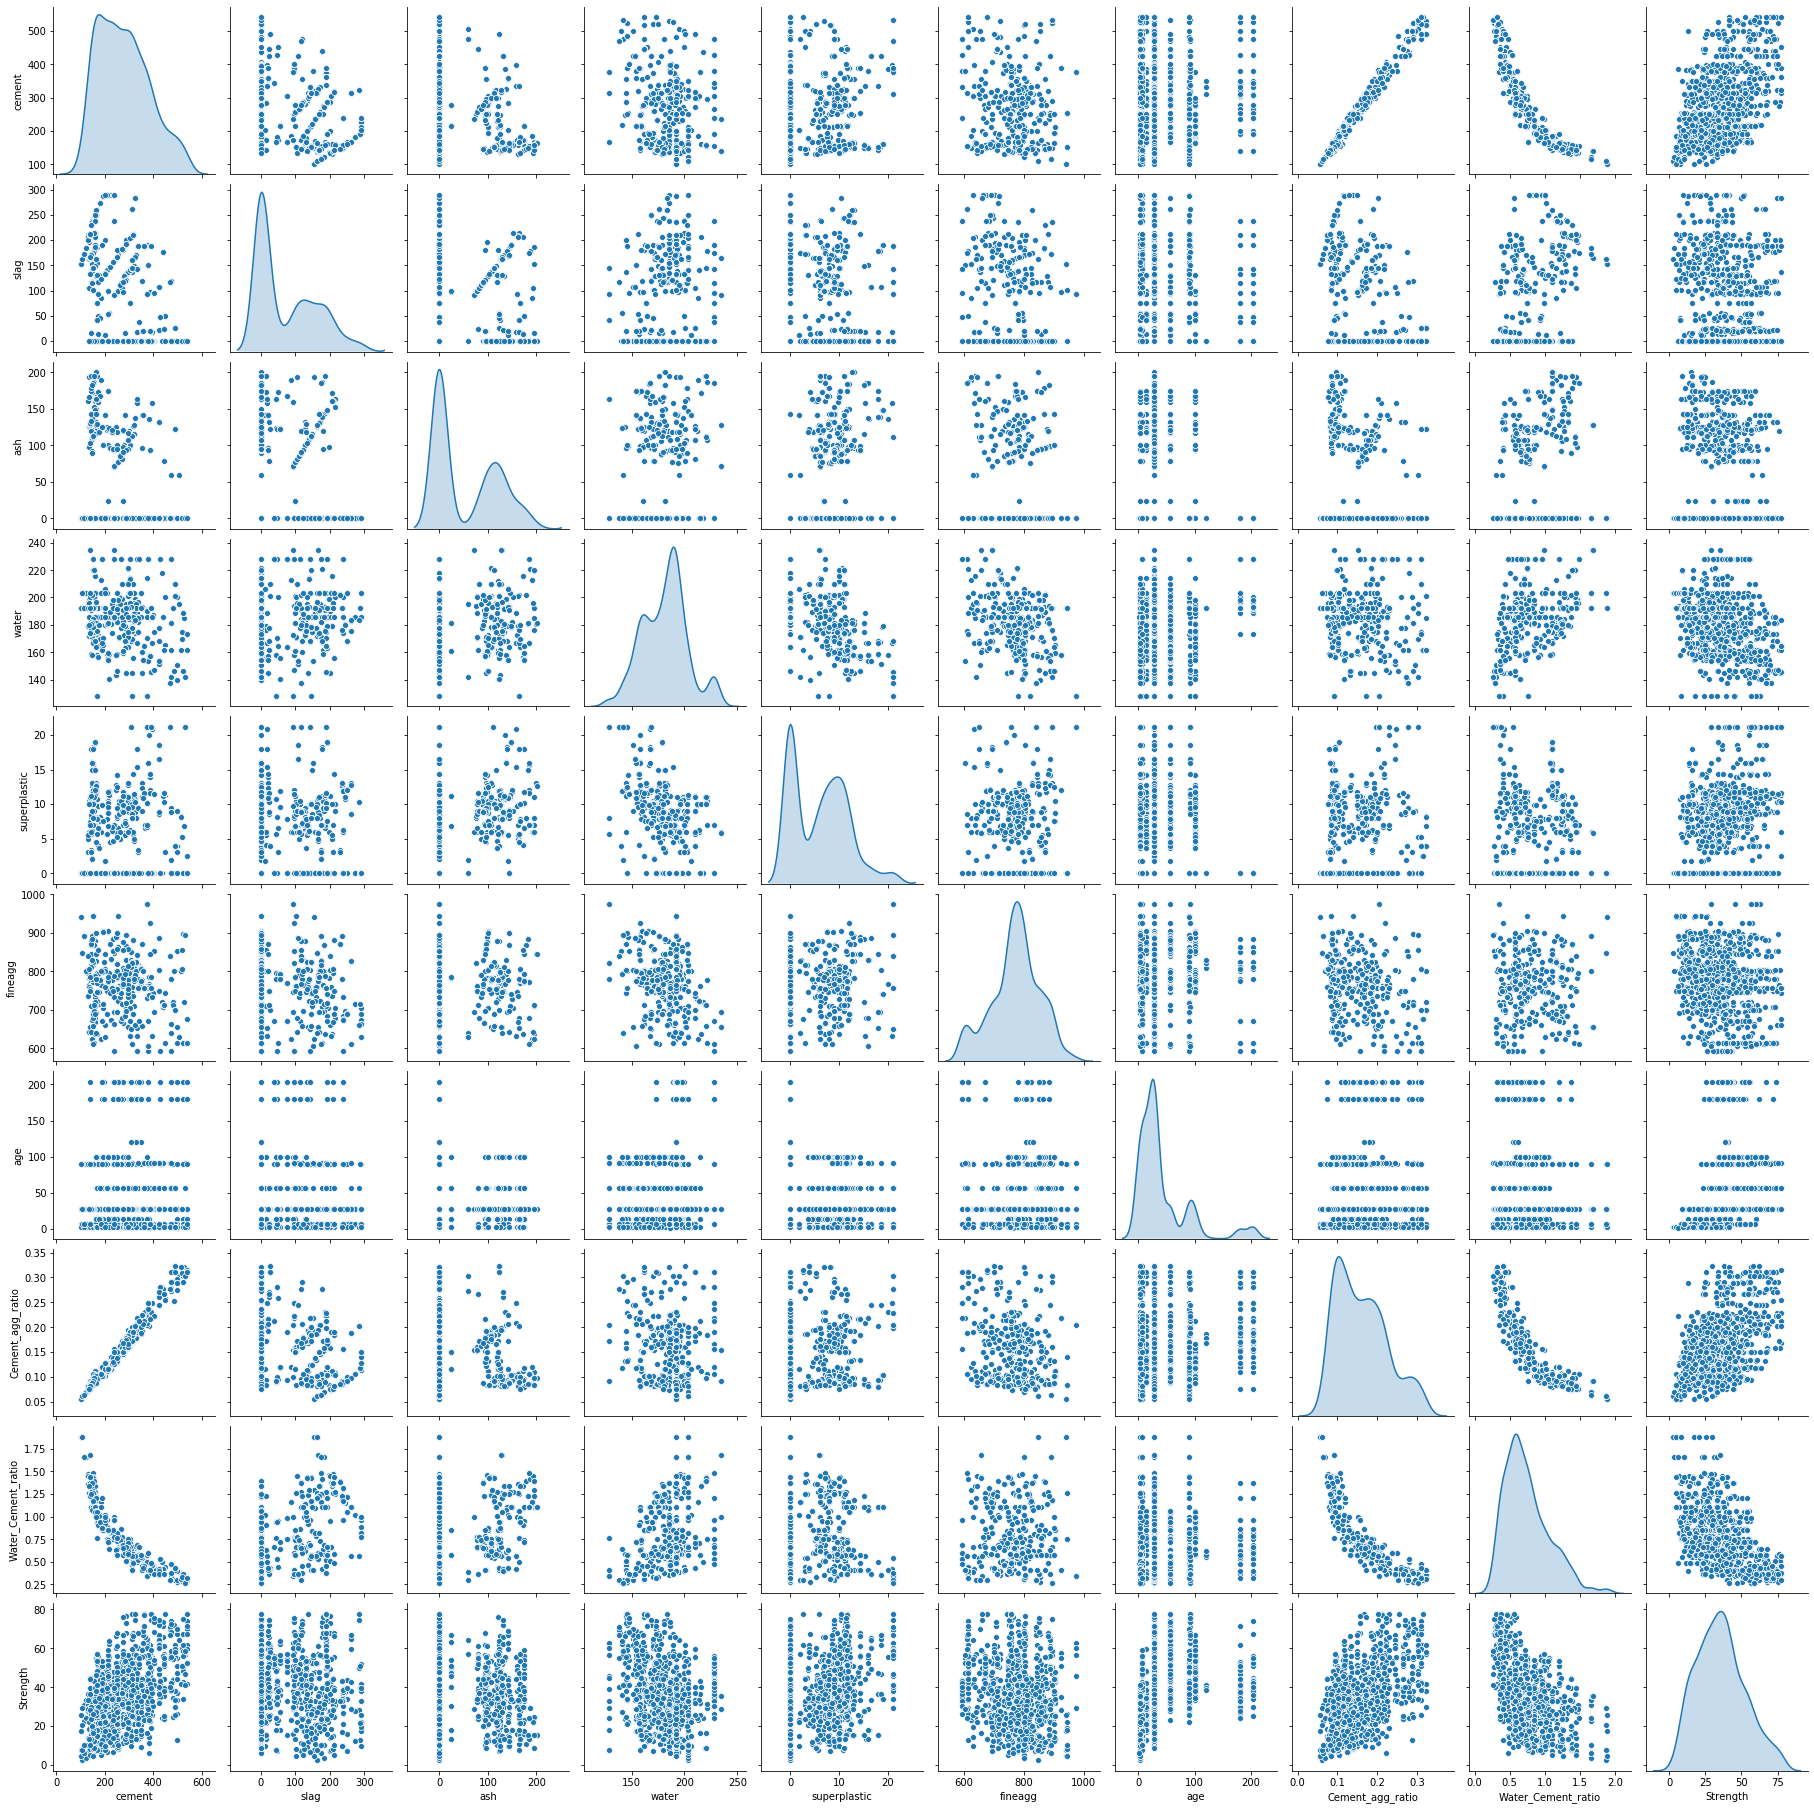

In [43]:
sns.pairplot(data , diag_kind = 'kde')

Observing the the Kde plots of the attributes we can see 2-3 Normal distribution Clusters. Thus we will form clusters within the dataset and try to analyse attributes in all the formed clusters.

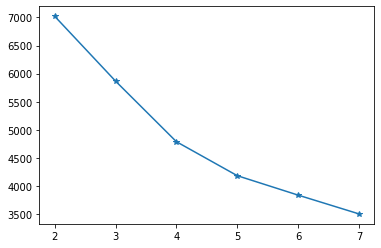

In [44]:
# Getting the attributes ready 
X = data.drop(['Strength'],axis = 1)
X_scaled = scaler.fit_transform(X)

# Selecting number of clusters
from sklearn.cluster import KMeans
### \\from scipy.spatial.distance import cdist
Mean_deviation = [] # list of errors

for i in range (2,8):
    cluster = KMeans(n_clusters= i)
    cluster.fit(X_scaled)
## \\error = sum(np.min(cdist(X_scaled,cluster.cluster_centers_,'euclidean'), axis = 1))
    error = cluster.inertia_
    Mean_deviation.append(error)

# Plotting the inertia or errors    
x = np.arange(2,8)
plt.plot(x , Mean_deviation,'-*')

<b> We can see max decrease at 4 clusters thus we will form 4 clusters and try to analyse the attributes at every clusters </b>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF31337AC8>,
      dtype=object)

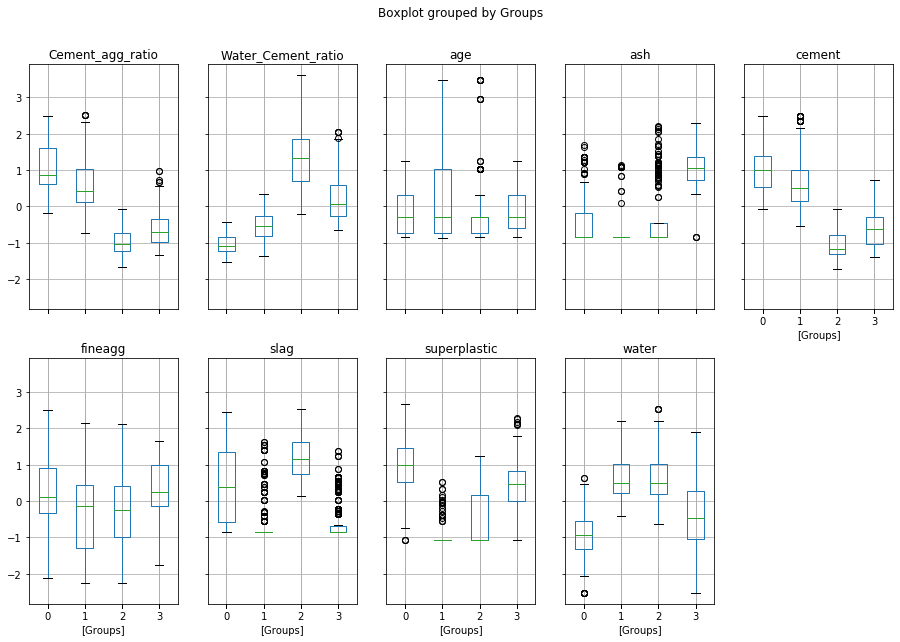

In [45]:
# Clustering the data_set 
cluster = KMeans(n_clusters= 4)
cluster.fit(X_scaled)
X_scaled = pd.DataFrame(X_scaled,columns = X.columns)
X_scaled['Groups'] = cluster.labels_

# Plotting Boxplots for each clusters
X_scaled.boxplot(by = 'Groups',  layout=(2,5), figsize=(15, 10))

We can see that we cannot see clear distinction in any of the attributes for all the classes.
Even if we address the outliers there will still be overlaps of the attribute plot within the groups.

We will try 3 clusters and observe the box-plot distribution for each group for a given attribute.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF315AA588>,
      dtype=object)

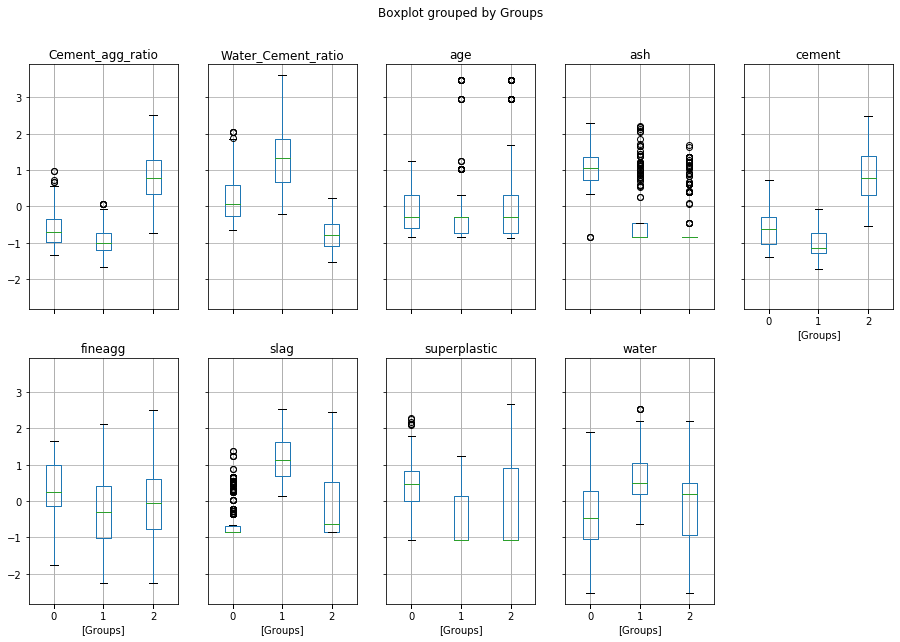

In [46]:
# Clustering the data_set 
cluster = KMeans(n_clusters= 3)
cluster.fit(X_scaled)
X_scaled = pd.DataFrame(X_scaled,columns = X.columns)
X_scaled['Groups'] = cluster.labels_

# Plotting Boxplots for each clusters
X_scaled.boxplot(by = 'Groups',  layout=(2,5), figsize=(15, 10))

3 Clusters also do not show any clear distinction in any features which might help us for grouping and analysing the data set training different models for each group.

Thus we will go with single model for entire dataset.

# Model Selection

## Train Validation Test Split ( for scaled models)

In [47]:
# Separating the Independent and Dependent Attributes.
X = data.drop(['Strength'],axis = 1)
Y = data['Strength']

# Training and Test Split
x_,x_test,y_,y_test = train_test_split(X,Y,test_size =0.3, random_state = 7)

# Training and Validation Split
x_train,x_val,y_train,y_val = train_test_split(x_,y_,test_size =0.4, random_state = 10)

# Scale the attributes
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [48]:
def train_predict(clf,x_train,y_train,x_val,y_val,model_name):  
    clf.fit(x_train,y_train)
    print("Score of the "+ model_name +" model " + str(clf.score(x_val,y_val)))
    # Adjusted R Squared Value
    print("Adjusted R Squared value of the "+ model_name +" model " + str(adj_r2(x_val,clf.score(x_val,y_val))))

## KNN

In [49]:
# Intialising the model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

# Checking the accuracy(R squared and Adjusted R squared Values) of the model(on validation data)
train_predict(knn,x_train,y_train,x_val,y_val,'KNN')

Score of the KNN model 0.7021833368628903
Adjusted R Squared value of the KNN model 0.47670858174751296


In [50]:
# Tuning the model
para = [
    {
    'n_neighbors' : np.arange(1,10,2),
    'weights' : ['uniform', 'distance'],
    'metric':['euclidean', 'manhattan', 'minkowski'],
    'leaf_size' : np.arange(10,30)
}
               ]

# Grid Search
clf = GridSearchCV(knn,para,n_jobs=-1,cv = 5 ,verbose= True, scoring='r2')
best = clf.fit(x_val,y_val)

best.best_params_

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 2989 out of 3000 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:    1.7s finished


{'leaf_size': 10,
 'metric': 'euclidean',
 'n_neighbors': 7,
 'weights': 'distance'}

In [51]:
# Using best estimator after Tune
knn = best.best_estimator_
# Checking the accuracy(R squared and Adjusted R squared Values) of the model(on validation data)
train_predict(knn,x_train,y_train,x_val,y_val,'KNN')

Score of the KNN model 0.748173093057119
Adjusted R Squared value of the KNN model 0.5455617828899679


## SVM

In [52]:
# Intialising the model
from sklearn.svm import SVR
SVM = SVR()

# Checking the accuracy(R squared and Adjusted R squared Values) of the model(on validation data)
train_predict(SVM,x_train,y_train,x_val,y_val,'SVM')

Score of the SVM model 0.5943650292021256
Adjusted R Squared value of the SVM model 0.3324075230332322


In [53]:
# Tuning the model
para = [
    {
    'C' : [0.01,0.1,1,10,100],
    'gamma' : [0.001,0.01,0.1,1],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'degree': np.arange(1,6),
}
               ]

# Grid Search
clf = GridSearchCV(SVM,para,n_jobs=-1,cv = 5 ,verbose= True, scoring='r2')
best = clf.fit(x_val,y_val)

best.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  1.4min finished


{'C': 100, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [54]:
# Using best estimator after Tune
SVM = best.best_estimator_

# Checking the accuracy(R squared and Adjusted R squared Values) of the model(on validation data)
train_predict(SVM,x_train,y_train,x_val,y_val,'SVM')

Score of the SVM model 0.7820171221707277
Adjusted R Squared value of the SVM model 0.5990201593478058


# Decision Trees

## Train Validation Test Split ( for Decison trees)

In [55]:
# Separating the Independent and Dependent Attributes.
X = data.drop(['Strength'],axis = 1)
Y = data['Strength']

# Training and Test Split
x_,x_test,y_,y_test = train_test_split(X,Y,test_size =0.3, random_state = 7)

# Training and Validation Split
x_train,x_val,y_train,y_val = train_test_split(x_,y_,test_size =0.4, random_state = 10)

## Random Forest Classifier

In [56]:
# Intialising the model
RF = RandomForestRegressor(random_state=1)

# Checking the accuracy(R squared and Adjusted R squared Values) of the model(on validation data)
train_predict(RF,x_train,y_train,x_val,y_val,'Random Forest')

Score of the Random Forest model 0.8611881620752416
Adjusted R Squared value of the Random Forest model 0.7333110198694531


In [57]:
# Tuning the model
para = [
    {
    'n_estimators' : [3000,1000],
    'min_samples_leaf': np.arange(1,5,1),
    'max_features':np.arange(8,11,1),
    'max_depth' :np.arange(10,15,1)
}
               ]

# Grid Search
clf = GridSearchCV(RF,para,n_jobs=-1,cv = 5 ,verbose= True, scoring='r2')
best = clf.fit(x_val,y_val)

best.best_params_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.6min finished


{'max_depth': 14,
 'max_features': 9,
 'min_samples_leaf': 1,
 'n_estimators': 3000}

In [58]:
# Using best estimator after Tune
RF = best.best_estimator_

# Checking the accuracy(R squared and Adjusted R squared Values) of the model(on validation data)
train_predict(RF,x_train,y_train,x_val,y_val,'Random Forest')

Score of the Random Forest model 0.8635515331370687
Adjusted R Squared value of the Random Forest model 0.7375187100731683


## Gradient Boosting

In [59]:
# Intialising the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators= 1000,learning_rate= 0.1,random_state=1)

# Checking the accuracy(R squared and Adjusted R squared Values) of the model(on validation data)
train_predict(GBR,x_train,y_train,x_val,y_val,'Gradient Boosting')

Score of the Gradient Boosting model 0.8860919608866022
Adjusted R Squared value of the Gradient Boosting model 0.7782286071203756


In [60]:
# Tuning the model
para = [
    {
    'n_estimators' : [3000,2000,1000],
    'min_samples_leaf': np.arange(1,5,1),
    'max_depth' :np.arange(3,5,1),
}
               ]

# Grid Search
clf = GridSearchCV(GBR,para,n_jobs=-1,cv = 5 ,verbose= True, scoring='r2')
best = clf.fit(x_val,y_val)

best.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   22.7s finished


{'max_depth': 3, 'min_samples_leaf': 3, 'n_estimators': 1000}

In [61]:
# Using best estimator after Tune
GBR = best.best_estimator_

# Checking the accuracy(R squared and Adjusted R squared Values) of the model(on validation data)
train_predict(GBR,x_train,y_train,x_val,y_val,'Gradient Boosting')

Score of the Gradient Boosting model 0.8851689605800662
Adjusted R Squared value of the Gradient Boosting model 0.7765409948638915


## XGB

In [62]:
# Intializing the model
import xgboost as xgb
XGB = xgb.XGBRegressor(learning_rate =0.05,n_estimators=3000,max_depth=4)

# Checking the accuracy(R squared and Adjusted R squared Values) of the model(on validation data)
train_predict(XGB,x_train,y_train,x_val,y_val,'XGB')

Score of the XGB model 0.8932722748621952
Adjusted R Squared value of the XGB model 0.7914171427483677


In [63]:
#Defining the function for calculating the optimum number of esimators for the given set parameters of the XGB classifier

def model_fit(model,xgbtrain,cv = True):
    xgb_param = model.get_xgb_params()
    cvresult = xgb.cv(xgb_param, xgbtrain, num_boost_round=3000, 
                      nfold=5,metrics='rmse',early_stopping_rounds=100
                 )
    model.set_params(n_estimators=cvresult.shape[0])
    print("Best number of steps " + str(cvresult.shape[0]))
    return(model)

In [64]:
# Creating training matrix
xgbtrain = xgb.DMatrix(x_train.values, label=y_train)
xgbval = xgb.DMatrix(x_val.values, label=y_val)

XGB = model_fit(XGB,xgbtrain)

# Checking the accuracy(R squared and Adjusted R squared Values) of the model(on validation data)
train_predict(XGB,x_train,y_train,x_val,y_val,'XGB')

Best number of steps 885
Score of the XGB model 0.8925859425677485
Adjusted R Squared value of the XGB model 0.7901519121234126


     PERFORMANCE ON TEST DATA OF ALL THE MODELS

    KNN Regressor       :  Acc(R2) - 0.748  Adj R2 - 0.545
    SVM Regressor       :  Acc(R2) - 0.782  Adj R2 - 0.599 
    Random Forest       :  Acc(R2) - 0.863  Adj R2 - 0.737 
    Gradient Boosting   :  Acc(R2) - 0.885  Adj R2 - 0.776 
    X.Gradient Boosting :  Acc(R2) - 0.892  Adj R2 - 0.790 
    
    Thus all the scoring parameters are best in Xtreme Gradient Boosting we choose it to be the best model.

# Feature Importance 

In [65]:
# Checking feature importance in XGB model
feature_imp = pd.DataFrame(XGB.feature_importances_ , index = X.columns,columns = ['XGB_f_imp'])
feature_imp['Random_f_imp'] = RF.feature_importances_
feature_imp['Gradient_f_imp'] = GBR.feature_importances_

In [66]:
feature_imp

,XGB_f_imp,Random_f_imp,Gradient_f_imp
cement,0.008865,0.017046,0.013928
slag,0.066812,0.066307,0.063952
ash,0.016876,0.012904,0.006494
water,0.036739,0.041439,0.051185
superplastic,0.092578,0.055404,0.085166
fineagg,0.026249,0.029875,0.041803
age,0.219966,0.367608,0.402148
Cement_agg_ratio,0.241456,0.124176,0.130835
Water_Cement_ratio,0.290458,0.285240,0.204489


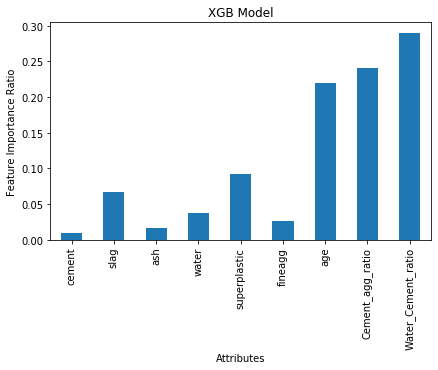

In [67]:
# Plotting feature importance of XGB model
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Attributes')
ax1.set_ylabel('Feature Importance Ratio')
ax1.set_title("XGB Model")
feature_imp['XGB_f_imp'].plot(kind='bar')

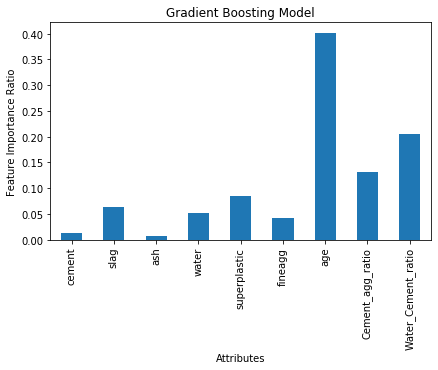

In [68]:
# Plotting feature importance of GB model
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Attributes')
ax1.set_ylabel('Feature Importance Ratio')
ax1.set_title("Gradient Boosting Model")
feature_imp['Gradient_f_imp'].plot(kind='bar')

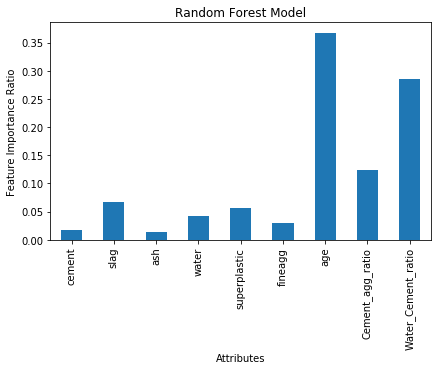

In [69]:
# Plotting feature importance of Random Forest model
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Attributes')
ax1.set_ylabel('Feature Importance Ratio')
ax1.set_title("Random Forest Model")
feature_imp['Random_f_imp'].plot(kind='bar')

From the feature importance of the attributes taken from the top 3 Models namel ( XGB, Gradieant Boosting , Random Forest )
we can see although the values are changing the sequence of importance almost remains similar.

We can infer the three attributes <b>'Age','Cement_agg_ratio','Water_Cement_ratio'</b> have the most contribution to the models while the sequence within them changes according to the models.

Also the three attribute <b>'Cement','Ash'</b> have the least contribution to the models.

# Tuning the best model

In [70]:
# Intializing the model
XGB = xgb.XGBRegressor(learning_rate =0.05,n_estimators=3000,max_depth=4)

# Checking the accuracy(R squared and Adjusted R squared Values) of the model(on validation data)
train_predict(XGB,x_train,y_train,x_val,y_val,'XGB')

Score of the XGB model 0.8932722748621952
Adjusted R Squared value of the XGB model 0.7914171427483677


In [71]:
# Creating training matrix
xgbtrain = xgb.DMatrix(x_train.values, label=y_train)

# Finding Optimum number of iterations
XGB = model_fit(XGB,xgbtrain)

# Checking the accuracy(R squared and Adjusted R squared Values) of the model(on validation data)
train_predict(XGB,x_train,y_train,x_val,y_val,'XGB')

Best number of steps 885
Score of the XGB model 0.8925859425677485
Adjusted R Squared value of the XGB model 0.7901519121234126


In [72]:
# Tune 1 (Tuning the max_depth and min_child_weight) 
params = [
    {
    'max_depth' : np.arange(4,10,1),
    'min_child_weight' :np.arange(1,6,1)
}
    
]

clf = GridSearchCV(XGB,params,n_jobs=-1,cv = 5 , scoring='r2')
best = clf.fit(x_val,y_val)
best.best_params_


{'max_depth': 4, 'min_child_weight': 5}

In [73]:
# Using best estimator after Tune 1
XGB_tune_1 = best.best_estimator_

# Finding Optimum number of iterations for Tune 1
XGB_tune_1 = model_fit(XGB_tune_1,xgbtrain)

# Checking the accuracy(R squared and Adjusted R squared Values) of the model(on validation data)
train_predict(XGB_tune_1,x_train,y_train,x_val,y_val,'XGB')

Best number of steps 894
Score of the XGB model 0.8887643059064839
Adjusted R Squared value of the XGB model 0.7831246363390287


In [74]:
# Tune 2 (Tuning the gamma and reg_alpha) 
params = [
      {
    'gamma' : [0, 0.001, 0.005, 0.01],
    'reg_alpha':[0, 0.001, 0.005, 0.01]
    }
]

clf = GridSearchCV(XGB_tune_1,params,n_jobs=-1,cv = 5 , scoring='r2')
best = clf.fit(x_val,y_val)
best.best_params_

{'gamma': 0.5, 'reg_alpha': 1}

In [75]:
# Using best estimator after Tune 2
XGB_tune_2 = best.best_estimator_

# Finding Optimum number of iterations for Tune 2
XGB_tune_2 = model_fit(XGB_tune_2,xgbtrain)

# Checking the accuracy(R squared and Adjusted R squared Values) of the model(on validation data)
train_predict(XGB_tune_2,x_train,y_train,x_val,y_val,'XGB')

Best number of steps 594
Score of the XGB model 0.8851920561281436
Adjusted R Squared value of the XGB model 0.7765832012721243


In [76]:
# Tune 3 (Tuning the gamma and reg_alpha) 
params = [
      {
    'subsample':[i/10.0 for i in range(5,11)],
    'colsample_bytree':[i/10.0 for i in range(5,11)]
    }
]

clf = GridSearchCV(XGB_tune_2,params,n_jobs=-1,cv = 5 , scoring='r2')
best = clf.fit(x_val,y_val)
best.best_params_

{'colsample_bytree': 0.7, 'subsample': 0.5}

In [77]:
# Using best estimator after Tune 3
XGB_tune_3 = best.best_estimator_

# Finding Optimum number of iterations for Tune 3
XGB_tune_3 = model_fit(XGB_tune_3,xgbtrain)

# Checking the accuracy(R squared and Adjusted R squared Values) of the model(on validation data)
train_predict(XGB_tune_3,x_train,y_train,x_val,y_val,'XGB')

Best number of steps 941
Score of the XGB model 0.8883849836221117
Adjusted R Squared value of the XGB model 0.782428778451881


In [78]:
print("Score of the XGB Model (Initialised) : " + str(XGB.score(x_test,y_test)))
print("Score of the XGB Model (Tune_1) : " + str(XGB_tune_1.score(x_test,y_test)))
print("Score of the XGB Model (Tune_2) : " + str(XGB_tune_2.score(x_test,y_test)))
print("Score of the XGB Model (Tune_3) : " + str(XGB_tune_1.score(x_test,y_test)))

Score of the XGB Model (Initialised) : 0.920553012266284
Score of the XGB Model (Tune_1) : 0.9227921339636541
Score of the XGB Model (Tune_2) : 0.9188712641229224
Score of the XGB Model (Tune_3) : 0.9227921339636541


In [79]:
# Checking the cross validation Scores of all the models on the test data
from sklearn.model_selection import cross_val_score

# XGB Model (Initialised)
Score_model_1 = cross_val_score(XGB,x_test,y_test,cv = 10)
#XGB Model (Tune_1)
Score_model_2 = cross_val_score(XGB_tune_1,x_test,y_test,cv = 10)
# XGB Model (Tune_2)
Score_model_3 = cross_val_score(XGB_tune_2,x_test,y_test,cv = 10)
# XGB Model (Tune_3)
Score_model_4 = cross_val_score(XGB_tune_3,x_test,y_test,cv = 10)

# Mean scores of the models
print("Mean Score of the XGB Model (Initialised) : " + str(Score_model_1.mean()) + " and std of : " + str(Score_model_1.std()*100))
print("Mean Score of the XGB Model (Tune_1) : " + str(Score_model_2.mean())+ " and std of : " + str(Score_model_2.std()*100))
print("Mean Score of the XGB Model (Tune_2) : " + str(Score_model_3.mean())+ " and std of : " + str(Score_model_3.std()*100))
print("Mean Score of the XGB Model (Tune_3) : " + str(Score_model_4.mean())+ " and std of : " + str(Score_model_4.std()*100))

Mean Score of the XGB Model (Initialised) : 0.8717934201082039 and std of : 4.6756127072084634
Mean Score of the XGB Model (Tune_1) : 0.866374819367047 and std of : 5.649918657036093
Mean Score of the XGB Model (Tune_2) : 0.8653872211725228 and std of : 5.609138726494041
Mean Score of the XGB Model (Tune_3) : 0.8788488461139672 and std of : 4.126908028012379


### Thus we can say the Last tuned model is the best model because it gives a Accuracy Score of 92.2% on test data which is higher than the Intialised model (92.0%) on the test data set also at the same time we can see the Average Cross validation Accuracy of Last tuned model is highest (87.8%) with the lowest standard Deviation of (4.12%)

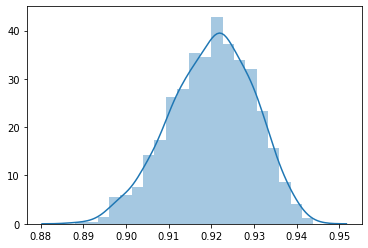

In [80]:
# Sampling the Data for Model Performance Evaluation
from sklearn.utils import resample
n_iterations = 1000
Scores = []
Values = data.values

for i in range (n_iterations):
    train = resample(Values,n_samples = round(len(data)*.75))
    test = np.array([z for z in Values if z.tolist() not in train.tolist()])
    model = best.best_estimator_ # Taking the best model i.e. teh XGB_TUNE_3 model for evaluation
    model.fit(train[:,:-1],train[:,-1])
    Scores.append(model.score(test[:,:-1],test[:,-1]))
    
#plotting Histogram
sns.distplot(Scores)
plt.show()

# Model Performance Range at 95 % Confidence Level

In [81]:
alpha = 0.95
p = (1 -alpha)/2*100
lower = max(0,np.percentile(Scores,p))
p = (alpha + (1 -alpha)/2)*100
upper = min(1,np.percentile(Scores,p))

print('At 95% Confidence Level the R2 scores or accuracy of the Model is between ' + str(lower) + " and " + str(upper))

At 95% Confidence Level the R2 scores or accuracy of the Model is between 0.8995142771332796 and 0.9377240028545515


### Thus this model will deliver an accuracy between 89.95% to 93.77% in the production with a confidence level of 95%